<a href="https://colab.research.google.com/github/pablex72/time-series-kaggle-practice/blob/main/Linear_Regression_With_Time_Series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [90]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [91]:
book_sales = pd.read_csv('/content/s2-r2-2019-2022.csv', index_col='Date',parse_dates=['Date'])

book_sales.rename( columns = { "NDVI": "Hardcover"}, inplace=True)

In [92]:
book_sales['Time'] = np.arange(len(book_sales.index))
book_sales['Lag_1'] = book_sales['Hardcover'].shift(1)
book_sales = book_sales.reindex(columns=['Hardcover', 'Time', 'Lag_1'])

dtype = {
    'store_nbr': 'category',
    'family': 'category',
    'sales': 'float32',
    'onpromotion': 'uint64',
}


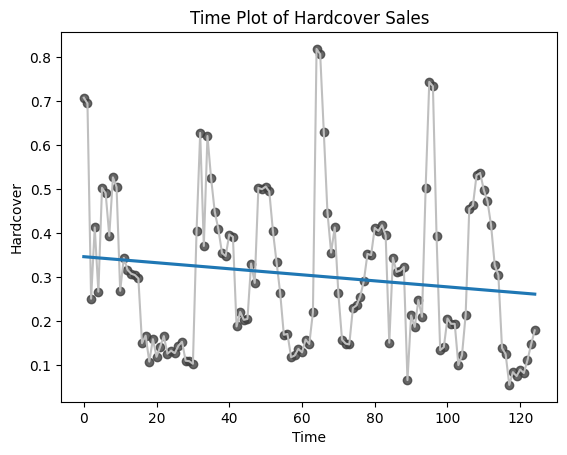

In [93]:
fig, ax = plt.subplots()
ax.plot('Time', 'Hardcover', data=book_sales, color='0.75')
ax = sns.regplot(x='Time', y='Hardcover', data=book_sales, ci=None, scatter_kws=dict(color='0.25'))
ax.set_title('Time Plot of Hardcover Sales');

Interpret linear regression with the time dummy¶
The linear regression line has an equation of (approximately) Hardcover = 3.33 * Time + 150.5. Over 6 days how much on average would you expect hardcover sales to change? After you've thought about it, run the next cell.

Interpreting the regression coefficients can help us recognize serial dependence in a time plot. Consider the model target = weight * lag_1 + error, where error is random noise and weight is a number between -1 and 1. The weight in this case tells you how likely the next time step will have the same sign as the previous time step: a weight close to 1 means target will likely have the same sign as the previous step, while a weight close to -1 means target will likely have the opposite sign.

# 2) Interpret linear regression with a lag feature¶
Run the following cell to see two series generated according to the model just described.

# 3) Fit a time-step feature¶ new sect
Complete the code below to create a linear regression model with a time-step feature on the series of average product sales. The target is in a column called 'sales'.

In [94]:
store_sales = pd.read_csv(
    '/content/s2-r2-2019-2022-correct.csv',
    dtype=dtype,
    parse_dates=['Date'],
    infer_datetime_format=True,
)
store_sales

,Date,NDVI
0,2019-01-26,0.708
1,2019-02-05,0.695
2,2019-03-07,0.251
3,2019-04-06,0.413
4,2019-04-26,0.267
...,...,...
120,2022-10-02,0.090
121,2022-10-17,0.082
122,2022-11-06,0.111
123,2022-11-16,0.147


In [95]:
store_sales = store_sales.set_index('Date').to_period('D')
average_sales = store_sales
average_sales

,NDVI
Date,
2019-01-26,0.708
2019-02-05,0.695
2019-03-07,0.251
2019-04-06,0.413
2019-04-26,0.267
...,...
2022-10-02,0.090
2022-10-17,0.082
2022-11-06,0.111


# 3) Fit a time-step feature
Complete the code below to create a linear regression model with a time-step feature on the series of average product sales. The target is in a column called 'sales'.

In [96]:
from sklearn.linear_model import LinearRegression

df = average_sales
df

,NDVI
Date,
2019-01-26,0.708
2019-02-05,0.695
2019-03-07,0.251
2019-04-06,0.413
2019-04-26,0.267
...,...
2022-10-02,0.090
2022-10-17,0.082
2022-11-06,0.111


In [97]:


time = np.arange(len(df.index))  # time dummy

df['time'] = time

X = df.loc[:, ['time']]  # features
y = df.loc[:, 'NDVI']  # target

model = LinearRegression()
model.fit(X, y)

y_pred = pd.Series(model.predict(X), index=X.index)


In [98]:
plot_params = {
    'color': 'blue',       # Line color
    'linestyle': '-',      # Line style (solid line)
    'marker': 'o',         # Marker style
    'label': 'Sales',      # Label for the legend
    # Add any other desired parameters
}

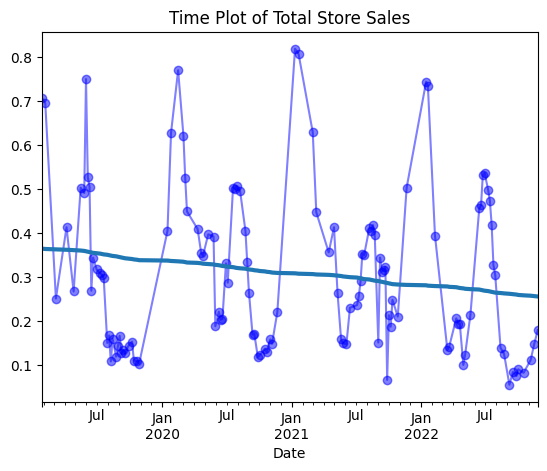

In [99]:
ax = y.plot(**plot_params, alpha=0.5)
ax = y_pred.plot(ax=ax, linewidth=3)
ax.set_title('Time Plot of Total Store Sales');

# 4) Fit a lag feature to Store Sales
Complete the code below to create a linear regression model with a lag feature on the series of average product sales. The target is in a column of df called 'sales'.

In [100]:
df

,NDVI,time
Date,,
2019-01-26,0.708,0
2019-02-05,0.695,1
2019-03-07,0.251,2
2019-04-06,0.413,3
2019-04-26,0.267,4
...,...,...
2022-10-02,0.090,120
2022-10-17,0.082,121
2022-11-06,0.111,122


In [101]:
lag_1 = df['NDVI'].shift(1)

df['lag_1'] = lag_1

X = df.loc[:, ['lag_1']]
X.dropna(inplace=True)  # drop missing values in the feature set
y = df.loc[:, 'NDVI']  # create the target
y, X = y.align(X, join='inner')  # drop corresponding values in target
#(y=NDVI[first-column]     x=lag[second-column] )

# Model LINEAR REGRESSION

In [102]:
y

Date
2019-02-05    0.695
2019-03-07    0.251
2019-04-06    0.413
2019-04-26    0.267
2019-05-16    0.503
              ...  
2022-10-02    0.090
2022-10-17    0.082
2022-11-06    0.111
2022-11-16    0.147
2022-11-26    0.179
Freq: D, Name: NDVI, Length: 124, dtype: float64

In [103]:
X

,lag_1
Date,
2019-02-05,0.708
2019-03-07,0.695
2019-04-06,0.251
2019-04-26,0.413
2019-05-16,0.267
...,...
2022-10-02,0.075
2022-10-17,0.090
2022-11-06,0.082


# (y=NDVI[first-column]     x=lag[second-column] )

 (X-LAG)
 2019-02-05  0.708 ---
 2019-03-07  0.695 ---


 (Y-NDVI)
 2019-02-05    0.695 ---
 2019-03-07    0.251 ---
 2019-04-06    0.413 ---

In [104]:
model = LinearRegression()
model.fit(X, y)

y_pred = pd.Series(model.predict(X), index=X.index)

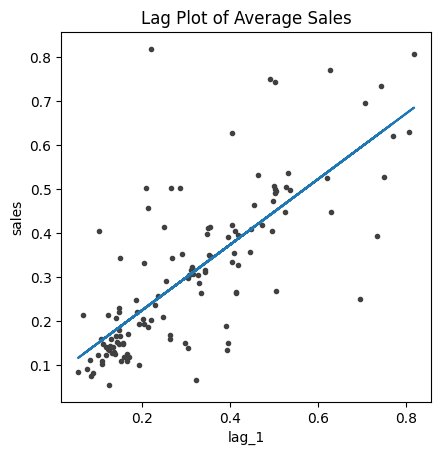

In [105]:
fig, ax = plt.subplots()
ax.plot(X['lag_1'], y, '.', color='0.25')
ax.plot(X['lag_1'], y_pred)
ax.set(aspect='equal', ylabel='sales', xlabel='lag_1', title='Lag Plot of Average Sales');

In [106]:
from sklearn.metrics import r2_score, mean_squared_error

# Calculate R2 score
r2 = r2_score(y, y_pred)

# Calculate RMSE
rmse = mean_squared_error(y, y_pred, squared=False)

print(f"R2 score: {r2:.4f}")
print(f"RMSE: {rmse:.4f}")


R2 score: 0.5746
RMSE: 0.1181


# Model Spline Regression

In [107]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures, SplineTransformer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [108]:
model_spline = make_pipeline(SplineTransformer(n_knots=4, degree=3), Ridge(alpha=1e-3))
model_spline.fit(X, y)

y_pred = pd.Series(model_spline.predict(X), index=X.index)
y_pred

Date
2019-02-05    0.540821
2019-03-07    0.534086
2019-04-06    0.260268
2019-04-26    0.391834
2019-05-16    0.268566
                ...   
2022-10-02    0.092385
2022-10-17    0.119160
2022-11-06    0.105324
2022-11-16    0.151011
2022-11-26    0.192738
Freq: D, Length: 124, dtype: float64

In [109]:
from sklearn.metrics import r2_score, mean_squared_error

# Calculate R2 score
r2 = r2_score(y, y_pred)

# Calculate RMSE
rmse = mean_squared_error(y, y_pred, squared=False)

print(f"R2 score: {r2:.4f}")
print(f"RMSE: {rmse:.4f}")

R2 score: 0.5888
RMSE: 0.1161


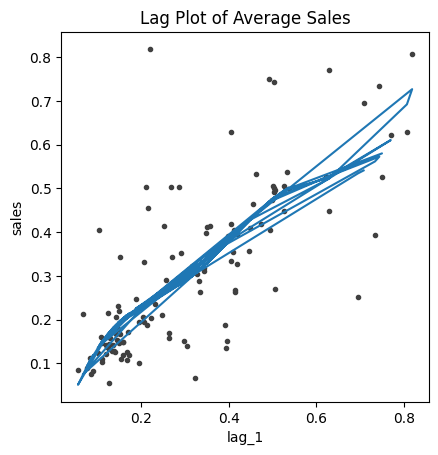

In [110]:
fig, ax = plt.subplots()
ax.plot(X['lag_1'], y, '.', color='0.25')
ax.plot(X['lag_1'], y_pred)
ax.set(aspect='equal', ylabel='sales', xlabel='lag_1', title='Lag Plot of Average Sales');